# Explore here

In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=";")
print(df.head()) 

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [2]:
df.shape

(41188, 21)

In [3]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# control de duplicados
df.duplicated().sum()

np.int64(12)

In [5]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.duplicated().sum()

np.int64(0)

In [10]:
#df.drop([], axis = 1, inplace = True)
#En este caso no veo columnas susceptibles a ser borradas, creo que todas son interesantes
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
df.job.value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [13]:
df.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [14]:
df.education.value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [15]:
df.default.value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [16]:
df.housing.value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [17]:
df.loan.value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [18]:
df.contact.value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [19]:
df.month.value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [20]:
df.day_of_week.value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [21]:
df.poutcome.value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [22]:
df.y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

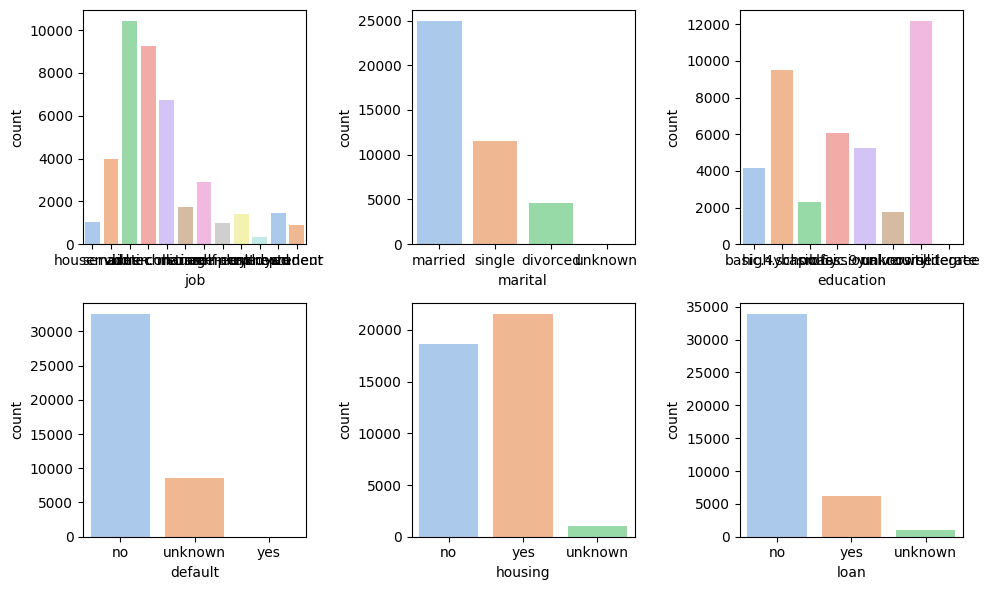

In [25]:
fig, axis = plt.subplots(2, 3, figsize=(10, 6))

sns.countplot(ax=axis[0, 0], data=df, x="job", palette='pastel', hue="job", legend=False)
sns.countplot(ax=axis[0, 1], data=df, x="marital", palette='pastel', hue="marital", legend=False)
sns.countplot(ax=axis[0, 2], data=df, x="education", palette='pastel', hue="education", legend=False)
sns.countplot(ax=axis[1, 0], data=df, x="default", palette='pastel', hue="default", legend=False)
sns.countplot(ax=axis[1, 1], data=df, x="housing", palette='pastel', hue="housing", legend=False)
sns.countplot(ax=axis[1, 2], data=df, x="loan", palette='pastel', hue="loan", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

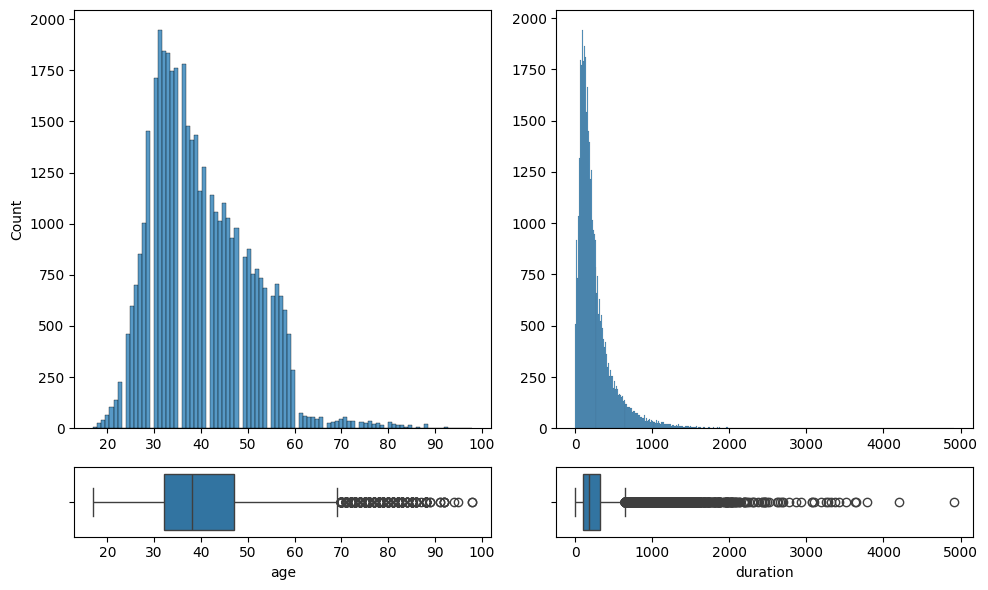

In [27]:
fig, axis = plt.subplots(2, 2, figsize=(10, 6), gridspec_kw={'height_ratios': [6, 1]})
sns.histplot(ax=axis[0, 0], data=df, x="age").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="age")
sns.histplot(ax=axis[0, 1], data=df, x="duration").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="duration")
plt.tight_layout()
plt.show()

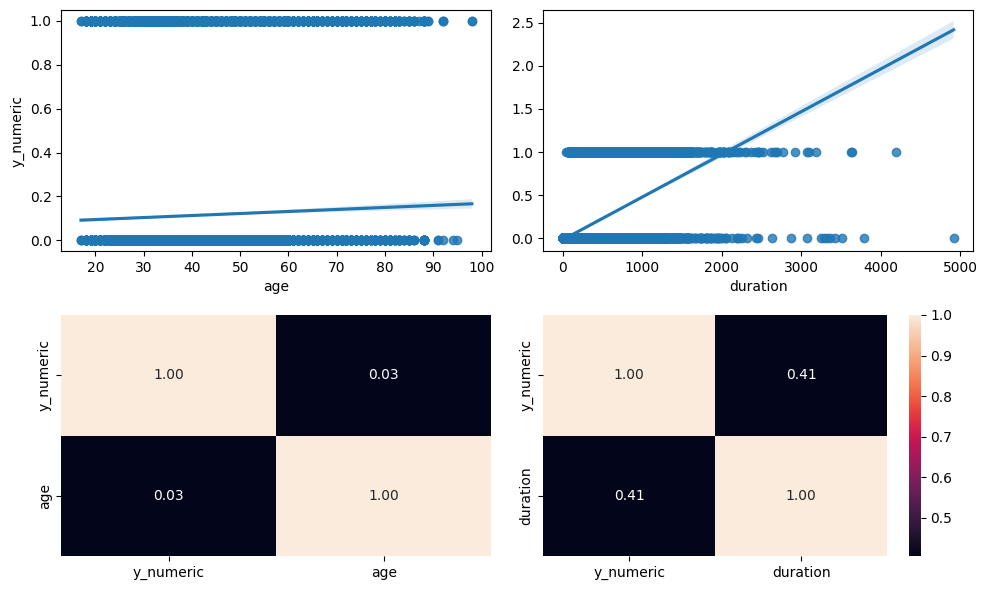

In [28]:
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.regplot(ax=axis[0, 0], data=df, x="age", y="y_numeric")
sns.heatmap(df[["y_numeric", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=df, x="duration", y="y_numeric").set(ylabel=None)
sns.heatmap(df[["y_numeric", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
plt.tight_layout()
plt.show()

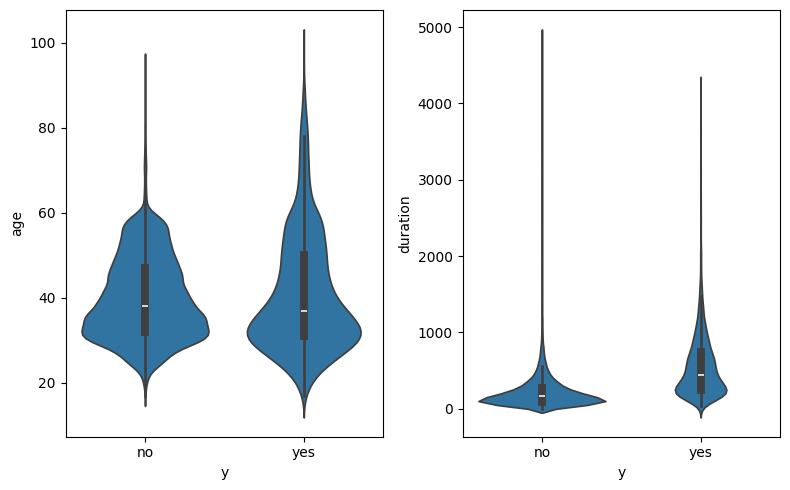

In [29]:
plt.show()

fig, axis = plt.subplots(1, 2, figsize=(8, 5))

sns.violinplot(ax=axis[0], x='y', y='age', data=df)
sns.violinplot(ax=axis[1], x='y', y='duration', data=df)

plt.tight_layout()

plt.show()

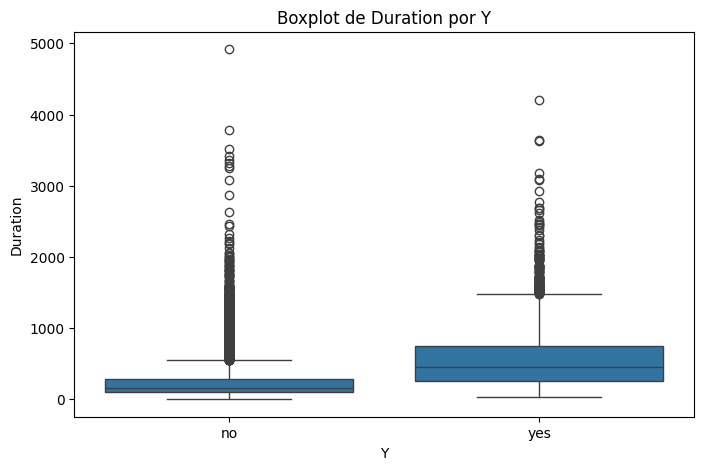

In [30]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='y', y='duration', data=df)

plt.title('Boxplot de Duration por Y')
plt.xlabel('Y')
plt.ylabel('Duration')
plt.show()

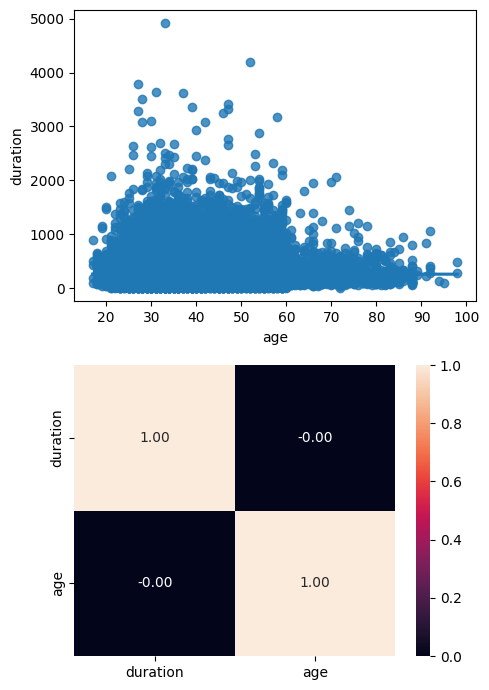

In [31]:
fig, axis = plt.subplots(2, 1, figsize=(5, 7))

sns.regplot(ax=axis[0], data=df, x="age", y="duration")
sns.heatmap(df[["duration", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1])

plt.tight_layout()

plt.show()

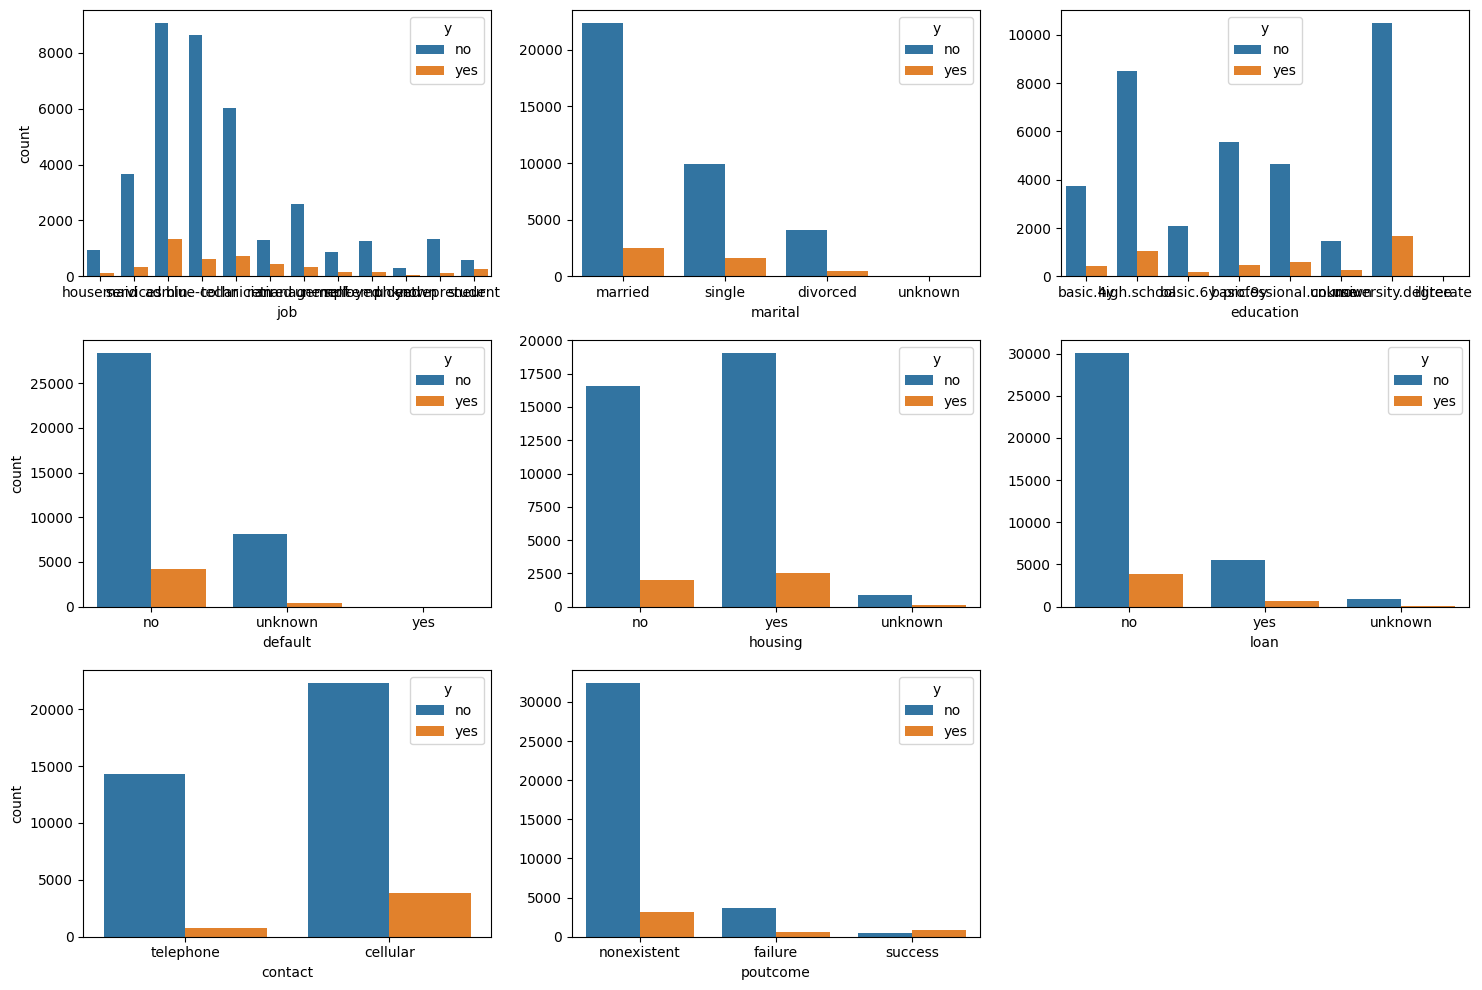

In [35]:
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(ax=axis[0, 0], data=df, x="job", hue="y")
sns.countplot(ax=axis[0, 1], data=df, x="marital", hue="y").set(ylabel=None)
sns.countplot(ax=axis[0, 2], data=df, x="education", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 0], data=df, x="default", hue="y")
sns.countplot(ax=axis[1, 1], data=df, x="housing", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 2], data=df, x="loan", hue="y").set(ylabel=None)
sns.countplot(ax=axis[2, 0], data=df, x="contact", hue="y")
sns.countplot(ax=axis[2, 1], data=df, x="poutcome", hue="y").set(ylabel=None)

plt.tight_layout()
fig.delaxes(axis[2, 2])

plt.show()

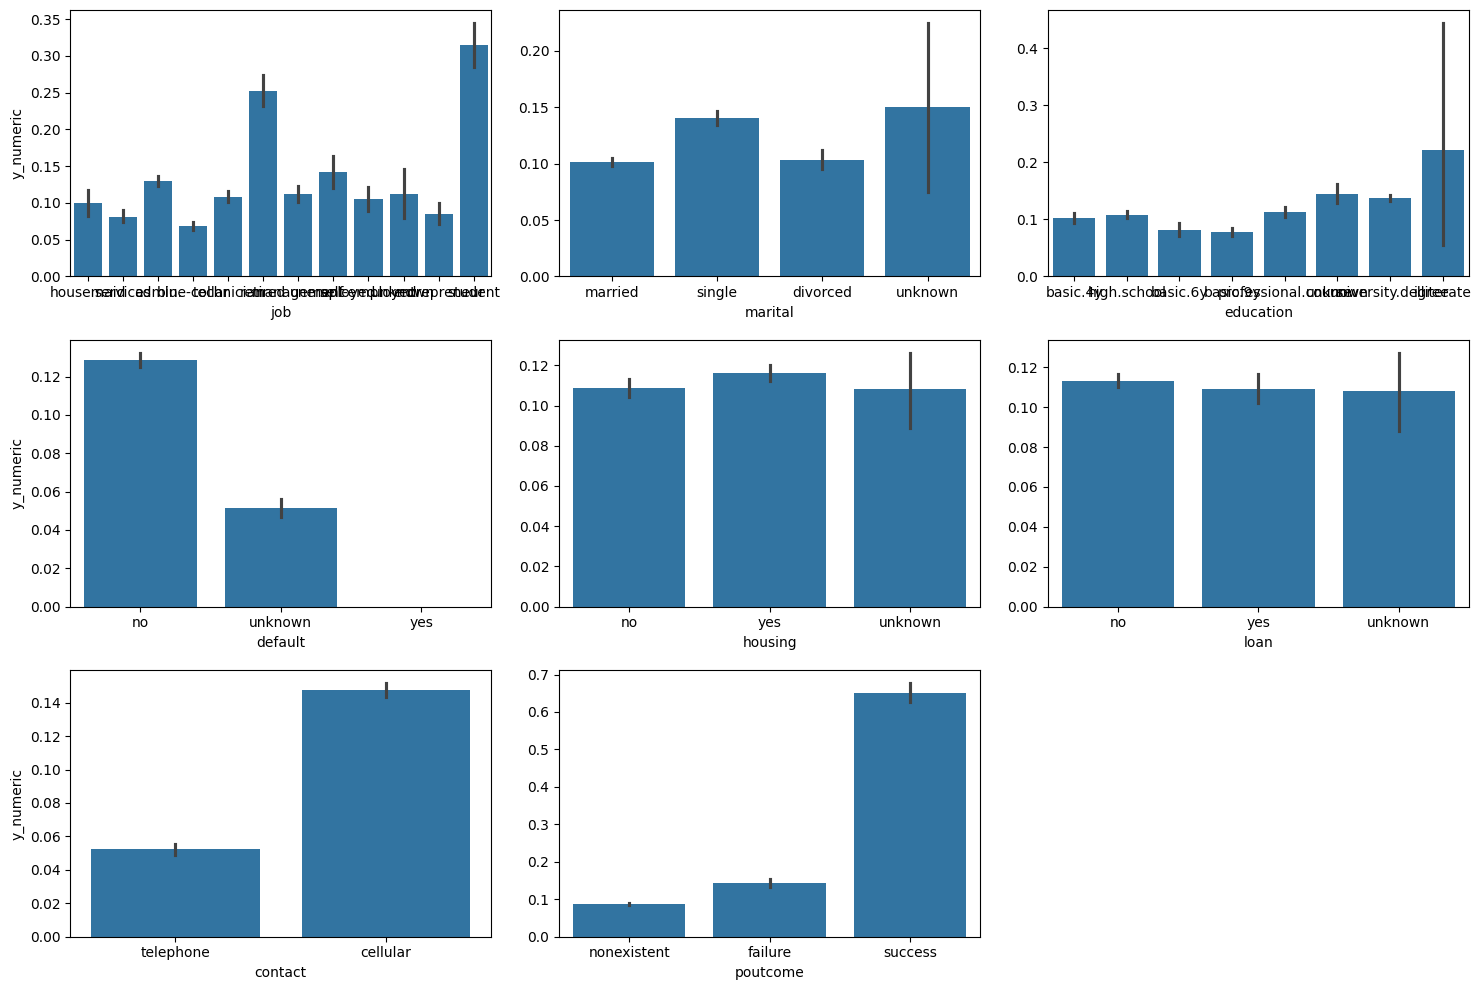

In [39]:

fig, axis = plt.subplots(3, 3, figsize=(15, 10))

sns.barplot(ax=axis[0, 0], data=df, x="job", y="y_numeric")
sns.barplot(ax=axis[0, 1], data=df, x="marital", y="y_numeric").set(ylabel=None)
sns.barplot(ax=axis[0, 2], data=df, x="education", y="y_numeric").set(ylabel=None)
sns.barplot(ax=axis[1, 0], data=df, x="default", y="y_numeric")
sns.barplot(ax=axis[1, 1], data=df, x="housing", y="y_numeric").set(ylabel=None)
sns.barplot(ax=axis[1, 2], data=df, x="loan", y="y_numeric").set(ylabel=None)
sns.barplot(ax=axis[2, 0], data=df, x="contact", y="y_numeric")
sns.barplot(ax=axis[2, 1], data=df, x="poutcome", y="y_numeric").set(ylabel=None)

plt.tight_layout()
fig.delaxes(axis[2, 2])

plt.show()

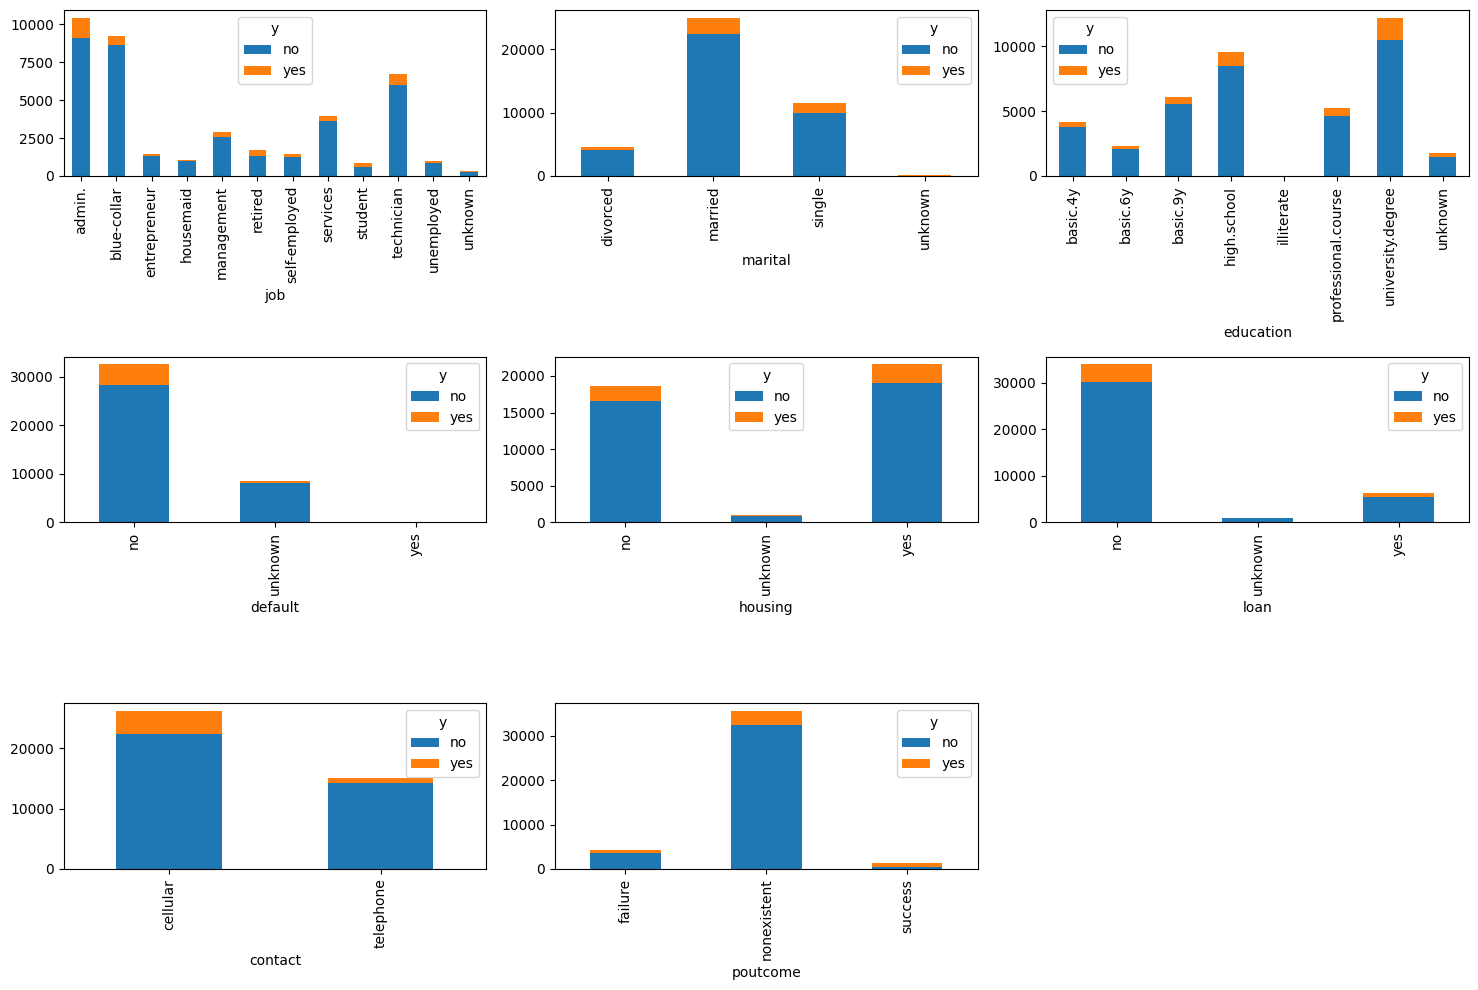

In [40]:
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

crosstab_job = pd.crosstab(df['job'], df['y'])
crosstab_job.div(crosstab_job.sum(1).astype(float), axis=0)
crosstab_job.plot(kind='bar', stacked=True, ax=axis[0, 0])

crosstab_marital = pd.crosstab(df['marital'], df['y'])
crosstab_marital.div(crosstab_marital.sum(1).astype(float), axis=0)
crosstab_marital.plot(kind='bar', stacked=True, ax=axis[0, 1])

crosstab_education = pd.crosstab(df['education'], df['y'])
crosstab_education.div(crosstab_education.sum(1).astype(float), axis=0)
crosstab_education.plot(kind='bar', stacked=True, ax=axis[0, 2])

crosstab_default = pd.crosstab(df['default'], df['y'])
crosstab_default.div(crosstab_default.sum(1).astype(float), axis=0)
crosstab_default.plot(kind='bar', stacked=True, ax=axis[1, 0])

crosstab_housing = pd.crosstab(df['housing'], df['y'])
crosstab_housing.div(crosstab_housing.sum(1).astype(float), axis=0)
crosstab_housing.plot(kind='bar', stacked=True, ax=axis[1, 1])

crosstab_loan = pd.crosstab(df['loan'], df['y'])
crosstab_loan.div(crosstab_loan.sum(1).astype(float), axis=0)
crosstab_loan.plot(kind='bar', stacked=True, ax=axis[1, 2])

crosstab_contact = pd.crosstab(df['contact'], df['y'])
crosstab_contact.div(crosstab_contact.sum(1).astype(float), axis=0)
crosstab_contact.plot(kind='bar', stacked=True, ax=axis[2, 0])

crosstab_poutcome = pd.crosstab(df['poutcome'], df['y'])
crosstab_poutcome.div(crosstab_poutcome.sum(1).astype(float), axis=0)
crosstab_poutcome.plot(kind='bar', stacked=True, ax=axis[2, 1])

plt.tight_layout()
fig.delaxes(axis[2, 2])

plt.show()

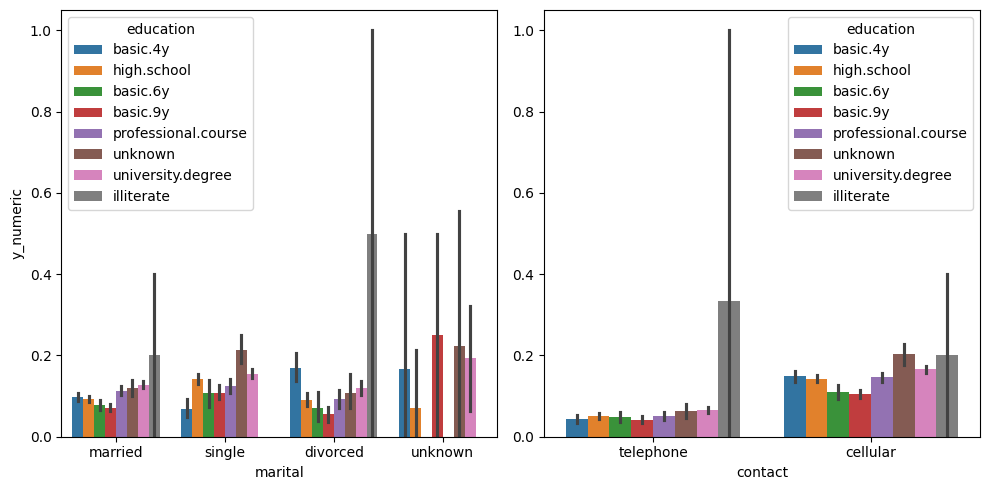

In [41]:
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

sns.barplot(ax=axis[0], data=df, x="marital", y="y_numeric", hue="education")
sns.barplot(ax=axis[1], data=df, x="contact", y="y_numeric", hue="education").set(ylabel=None)

plt.tight_layout()

plt.show()

In [42]:
df["marital_n"] = pd.factorize(df["marital"])[0]
df["contact_n"] = pd.factorize(df["contact"])[0]

In [43]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric,marital_n,contact_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0


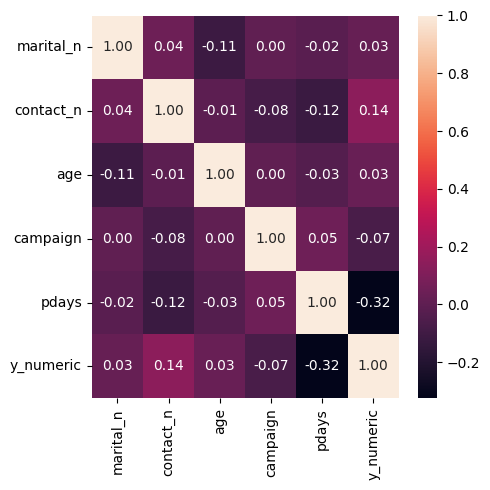

In [44]:
fig, axis = plt.subplots(figsize=(5, 5))

sns.heatmap(df[["marital_n", "contact_n", "age", "campaign", "pdays", "y_numeric"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()

plt.show()